<h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 7</h6>
<h6 align="center">Dekompozycja spektralna</h6>
<h6 align="center">22 kwietnia 2020</h6>

In [2]:
from numpy.linalg import eig, norm
from random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.linalg as linalg

epsilon = 0.0000001
inteartions = 99999

Funkcje pomocnicze:

In [3]:
def show_matrix(mat):
    for i in mat:
        for j in i:
            print(j, end=' ')
        print()
    print()

In [4]:
def get_matrx(size):
    A = []
    for i in range(size):
        A.append([])
        for j in range(size):
            A[i].append(randint(0,100))
    return A

In [5]:
def vector_normalization(vec):
    norm2 = norm(vec, ord=np.inf)
    return vec/norm2

<b>Zadanie 1 Metoda potęgowa</b> <br><hr>
Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).
* Powtarzaj mnożenie wektora xi przez macierz A: 


\begin{equation*}
x_{i+1} = Ax_{i}
\end{equation*}

dzieląc za każdym razem wektor wynikowy przez ||xi+1||
*  Element wektora xi o największej wartości bezwzględnej zbiega do dominującej wartości własne
* Przeskalowany wektor xi zbiega do dominującego wektora własnego
* Obliczenia powinny się zatrzymać po przekroczeniu maksymalnej liczby iteracji, albo w przypadku gdy ||xi −xi+1|| < e (kryterium małej poprawki
* Pod koniec obliczeń znormalizuj otrzymany wektor własny.

Funkcja realizująca metodę potęgową

In [20]:
def power_finding(size,A):
    x0 = np.array([1 for i in range(size)])
    x0 = np.array(x0/norm(x0,np.inf))
    out = False

    for i in range(inteartions):

        x1 = np.dot(A,x0)
        x2 = x1/norm(x1, np.inf)

        if norm(x2 - x0) < epsilon:
            out = True
        x0 = x2
        if out:
            break

    return norm(x1, np.inf), x0/norm(x0)

Sprawdzenie poprawności działania:

In [21]:
A = get_matrx(3)
show_matrix(A)
w, v = eig(A)
print("Funcja biblioteczna:")
print(w)
print(v)
print("Moja funckja:")
print(power_finding(3,A))

90 34 66 
5 29 20 
89 93 15 

Funcja biblioteczna:
[148.1213644   31.24307051 -45.36443491]
[[-0.77717933 -0.67813267 -0.3836325 ]
 [-0.1357858   0.69213353 -0.21570337]
 [-0.61445464  0.24715838  0.89794107]]
Moja funckja:
(148.1213690898814, array([0.77717934, 0.1357858 , 0.61445463]))


Wynik wartości własnej, oraz wektora jej odpowiadającemu są zgodne z funkcją biblioteczną.

In [26]:
A = get_matrx(5)
show_matrix(A)
w, v = eig(A)
print("Funcja biblioteczna:")
print(w)
print(v)
print("Moja funckja:")
print(power_finding(5,A))

42 28 47 15 57 
84 20 70 1 67 
73 69 37 70 69 
100 46 24 79 64 
68 52 89 79 21 

Funcja biblioteczna:
[269.44463612 +0.j          22.17223409 +0.j
 -23.65176573+25.07120471j -23.65176573-25.07120471j
 -45.31333875 +0.j        ]
[[ 0.31147816+0.j          0.21275846+0.j         -0.32286842-0.27721869j
  -0.32286842+0.27721869j -0.39318852+0.j        ]
 [ 0.38532967+0.j          0.68318833+0.j         -0.57105301-0.05402982j
  -0.57105301+0.05402982j -0.13697686+0.j        ]
 [ 0.50958797+0.j          0.01402583+0.j          0.20773912+0.15782669j
   0.20773912-0.15782669j -0.2387261 +0.j        ]
 [ 0.49034061+0.j         -0.65233103+0.j          0.09270809+0.28001178j
   0.09270809-0.28001178j -0.03816672+0.j        ]
 [ 0.50436949+0.j         -0.2495096 +0.j          0.57863531+0.j
   0.57863531-0.j          0.87646636+0.j        ]]
Moja funckja:
(269.44463741489847, array([0.31147816, 0.38532967, 0.50958797, 0.49034061, 0.50436949]))


Wynik wartości własnej, oraz wektora jej odpowiadającemu są zgodne z funkcją biblioteczną.

In [25]:
A = get_matrx(10)
show_matrix(A)
w, v = eig(A)
print("Funcja biblioteczna:")
print(w)
print(v)
print("Moja funckja:")
print(power_finding(10,A))

99 20 47 2 48 29 65 85 64 43 
82 80 89 83 71 78 97 95 92 19 
83 32 25 83 11 10 97 30 84 31 
21 6 21 38 8 21 99 13 81 21 
53 56 87 59 54 52 68 48 27 41 
29 27 12 73 10 49 39 1 62 49 
85 5 94 43 47 46 36 69 65 36 
21 71 41 24 54 100 17 50 18 37 
38 26 51 46 74 33 18 28 24 59 
44 65 65 18 20 39 88 78 56 49 

Funcja biblioteczna:
[479.87989607 +0.j          53.95102714+53.62916149j
  53.95102714-53.62916149j -49.55390512+40.3465158j
 -49.55390512-40.3465158j   -8.70557789+48.8671785j
  -8.70557789-48.8671785j   17.4135303 +24.57504837j
  17.4135303 -24.57504837j  -2.09004493 +0.j        ]
[[ 0.32168119+0.j          0.14850192+0.47130412j  0.14850192-0.47130412j
   0.01511653+0.27252751j  0.01511653-0.27252751j -0.32527072-0.06600621j
  -0.32527072+0.06600621j -0.0912553 -0.00611297j -0.0912553 +0.00611297j
   0.21416417+0.j        ]
 [ 0.49328283+0.j         -0.25566476-0.16155273j -0.25566476+0.16155273j
  -0.06424589+0.13251281j -0.06424589-0.13251281j -0.04104268-0.05710215j
  -0.041042

Wynik wartości własnej, oraz wektora jej odpowiadającemu są zgodne z funkcją biblioteczną.

<hr>

* Sprawdzamy teraz jak rośnie czas wykonania funkcji w zależności od wielkości macierzy

Funckja sprawdzająca:

In [30]:
def check_power_finding():
    y = []
    check_list = [x for x in range(100,2501,100)]
    for c in check_list:
        A = get_matrx(c)
        start = time.process_time()
        power_finding(c,A)
        end = time.process_time()
        print("Czas spedzony dla N = ",c,": ", end - start)
        y.append(end - start)

    plt.plot(check_list,y,'ro',markersize=1)
    plt.axis([0, 2600, 0.0, 6.0])
    plt.show()

Czas spedzony dla N =  100 :  0.0
Czas spedzony dla N =  200 :  0.125
Czas spedzony dla N =  300 :  0.25
Czas spedzony dla N =  400 :  0.390625
Czas spedzony dla N =  500 :  0.640625
Czas spedzony dla N =  600 :  1.0
Czas spedzony dla N =  700 :  1.359375
Czas spedzony dla N =  800 :  1.703125
Czas spedzony dla N =  900 :  1.640625
Czas spedzony dla N =  1000 :  2.46875
Czas spedzony dla N =  1100 :  2.484375
Czas spedzony dla N =  1200 :  2.953125
Czas spedzony dla N =  1300 :  3.484375
Czas spedzony dla N =  1400 :  3.609375
Czas spedzony dla N =  1500 :  3.828125
Czas spedzony dla N =  1600 :  4.03125
Czas spedzony dla N =  1700 :  4.0
Czas spedzony dla N =  1800 :  4.25
Czas spedzony dla N =  1900 :  4.203125
Czas spedzony dla N =  2000 :  4.71875
Czas spedzony dla N =  2100 :  4.984375
Czas spedzony dla N =  2200 :  5.140625
Czas spedzony dla N =  2300 :  5.265625
Czas spedzony dla N =  2400 :  5.515625
Czas spedzony dla N =  2500 :  5.703125


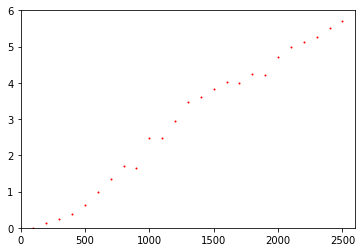

In [31]:
check_power_finding()

<b>Zadanie 2 Odwrotna metoda potęgowa</b> <br><hr>
Opierając się na twierdzeniu o transformacji widma macierzy:<br>
<b>Twierdzenie 1 </b> Macierz (<b>A</b>−σ<b>I</b>)−1 (jeśli istnieje), to ma wartości własne równe 1/(λk −σ) ( λk jest k-tą wartością macierzy <b>A</b>) i wektory własne identyczne z macierzą <b>A</b>.<br><br>
oraz wykorzystując metodę potęgową i faktoryzację LU zaimplementuj odwrotną metodę potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy A, dla wartości σ bliskich odpowiedniej wartości własnej. Wykorzystaj fakt, że mnożenie wektora xi przez macierz A−1 (xi+1 = A−1xi) odpowiada rozwiązaniu układu równań Axi+1 = xi.


* Funkcja realizująca odwrotną metodę potęgową

In [36]:
def inverse_power_method(size,A,sig):
    x0 = np.array([1.5 for i in range(size)])
    x0 = np.array(x0/np.linalg.norm(x0, ord=np.inf))
    for i in range(size):
        A[i][i] = A[i][i] - sig

    out = False
    LU = linalg.lu_factor(A)

    for i in range(inteartions):
        # Musimy obliczyc x z równania Ax = y za pomoca LU

        x1 = linalg.lu_solve(LU, x0)
        x2 = x1/np.linalg.norm(x1, ord=np.inf)

        if norm(x2 - x0) < epsilon:
            out = True

        x0 = x2

        if out:
            break

    return x1/norm(x1)

Funkcja testująca

In [37]:
def test_inverse_power_method():
    A = get_matrx(3)
    show_matrix(A)
    w, v = eig(A)
    print("Funcja biblioteczna:")
    print(w)
    print(v)
    print("Moja funckja:")
    print("Dla sigmy równej w przybliżeniu: ", w[0])
    print(inverse_power_method(3,A,w[0] + 0.0001))
    print("Dla sigmy równej w przybliżeniu: ", w[1])
    print(inverse_power_method(3,A,w[1] + 0.0001))
    print("Dla sigmy równej w przybliżeniu: ", w[2])
    print(inverse_power_method(3,A,w[2] + 0.0001))

In [41]:
test_inverse_power_method()

55 46 56 
3 78 83 
17 13 19 

Funcja biblioteczna:
[  2.94007804  37.85622532 111.20369664]
[[ 0.06854554 -0.75339692 -0.74180247]
 [ 0.7387145   0.60222537 -0.6314612 ]
 [-0.67052397 -0.26404107 -0.22580047]]
Moja funckja:
Dla sigmy równej w przybliżeniu:  2.940078043265167
[ 0.06854554  0.7387145  -0.67052397]
Dla sigmy równej w przybliżeniu:  37.856225320368424
[ 0.75339692 -0.60222537  0.26404107]
Dla sigmy równej w przybliżeniu:  111.20369663636636
[-0.74180247 -0.6314612  -0.22580047]


Jak widać wartości funkcji bibliotecznej zgadzają się z napisaną przezemnie funkcją.

<h3>Podsumowanie</h3><hr>

<h6> Zastosowanie</h6><br>Wartośći własne macierzy znajdują szerokie zastosowanie:

* algebrze i analizie liniowej,
* podstawach automatyki,
* procesach losowych i sterowaniu stochastycznym,
* identyfikacji procesów,
* nowoczesnych metodach teorii sterowania,
* sterowaniu cyfrowym,
* równaniach różniczkowych,
* geometrii różniczkowej,
* w algorytmie PCA, który jest używany np. do kompresji sygnałów,
* w fizyce i chemii kwantowej,
* w badaniu stabilności układów dynamicznych,
* Google wykorzystuje wartości własne przy ocenianiu ważności strony algorytm PageRank.


Równanie Schroedingera:<br>
Funkcje falowe elektronów w atomie wodoru mogą być postrzegane jako
wektory własne operatora energii i momentu pędu. Wartości własne
reprezentują wartość energii (n=1,2,3,...) i momentu pędu (s, p, d, ...).

Mechanika drgań: <br>
Wartości własne reprezentują
naturalne częstości drgań układu
złożonego z kilku elementów.
Wektory określają mody tych
drgań.

Dynamika ruchu obrotowego:<br>
Moment bezwładności trójwymiarowego
obiektu bez żadnych osi symetrii jest
dany macierzą 3 × 3. Wektory własne
to kierunki osi przechodzące przez
środek masy, wokół których obiekt
może się obracać bez precesji. Wartości
własne to wartości momentu pędu dla
danego kierunku.

Analiza głównych składowych<br>
Metoda statystyczna umożliwiająca zrzutowanie wysokomiarowego zbioru
danych na dwa lub trzy wymiary. Umożliwia ona wybrać te kierunki
wersorów, które charakteryzują się największą wariancją danych.

<b>Źródła pomocnicze</b>

http://www.if.pw.edu.pl/~agatka/numeryczne/wyklad_04.pdf
https://pl.wikipedia.org/wiki/Metoda_LU
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu.html
https://rperlinski.pl/strona/files/mn/w05_WartosciWektoryWlasne.pdf